In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ase.visualize import view
from ase.io import read

from skimage.io import imread, imsave
from skimage.draw import disk
from skimage.color import label2rgb

In [2]:
mos2 = read('mos2_defects.poscar')

In [3]:
view(mos2)

<Popen: returncode: None args: ['/home/anamendonca/miniconda3/envs/ase_env/b...>

In [ ]:
tem_img = imread('../computem_sim/mos2_defects.tif').T
tem_img.shape

(3326, 3840)

In [5]:
imsave('../images/mos2_defects.png',tem_img)

In [57]:
img_size = tem_img.shape
pixel_size = img_size / np.array([mos2.cell.array[0,0], mos2.cell.array[1,1]])
pixel_size

array([30.18867925, 30.19287728])

In [58]:
atoms_pixel_coords = np.rint(mos2.get_positions()[:,[0,1]] * pixel_size)

In [59]:
mask_img = np.ones((img_size[0],img_size[1], 1), dtype=int) * 2
mask_img.shape

(3840, 3326, 1)

In [60]:
mask_radius_mo = 28
mask_radius_s = 25

In [61]:
chemical_symbols = mos2.get_chemical_symbols()
for io in range(len(atoms_pixel_coords)):
    if chemical_symbols[io] == 'Mo':
        mask_radius = mask_radius_mo
        label = 1
    else:
        mask_radius = mask_radius_s
        label = 0
    rr, cc = disk((int(atoms_pixel_coords[io,0]), int(atoms_pixel_coords[io,1])), mask_radius, shape=mask_img.shape)
    mask_img[rr, cc, :] = label

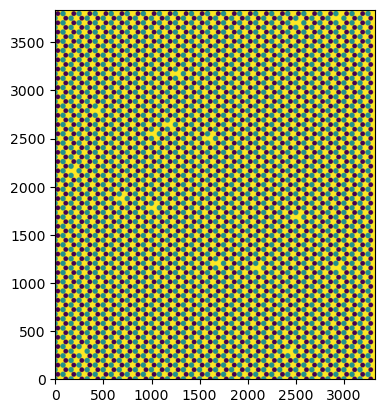

In [62]:
plt.imshow(mask_img,origin='lower')

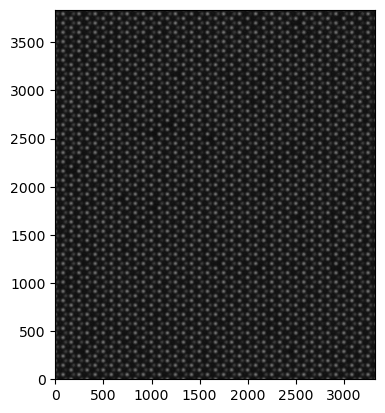

In [63]:
plt.imshow(tem_img,cmap='grey',origin='lower')

In [64]:
np.savez('mos2_supercell.npz', image = tem_img, label=mask_img)